# 使用决策树对鸢尾花数据集进行分类
## 决策树有三种，ID3、C4.5和CART（Classification And Regression Tree）分类与回归树算法
ID3算法：使用的是信息增益对决策树的属性进行划分，信息增益越大，意味着使用该属性进行划分所得到的“纯度提升”越大
但是信息增益准则对可取值数目较多的属性有所偏好，为减少这种偏好可能带来的不利影响，著名的 C4.5 决策树算法不直接使用信息增益，而是使用"增益率or信息增益比" (gain ratio) 来选择最优划分属性


C4.5算法：增益率准则对可取值数目较少的属性有所偏好。因此，C4.5算法并不是直接选择增益率最大的候选划分属性，而是先从候选划分属性中找出信息增益高于平均水平的属性再从中选择增益率最高的.


CART算法：cart算法是使用基尼指数作为分裂的标准，基尼指数最大为1，最小为0，反映了从数据集D中随机抽取两个样本，其类别标记不一致的概率。因此基尼指数越小越好，同时CART算法在决策树生成以后，下一步进行cart算法的剪枝操作，剪枝分为前剪枝和后剪枝，前剪枝是边生成树边剪枝，后剪枝是生成一颗完整的树过后，再进行剪枝操作。


本例中，在 scikit-learn 的 DecisionTreeClassifier 中，默认使用的是 CART（Classification and Regression Trees）算法，默认使用 Gini指数作为分裂标准，可以通过 criterion='entropy' 改成使用熵（类似于 ID3 和 C4.5）

In [1]:
# 导入必要的库
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# 加载鸢尾花数据集
iris = load_iris()
print("iris数据集是：\n",iris)
X = iris.data  # 特征数据
print("iris的数据X是：\n",X)
y = iris.target  # 目标标签
print("iris的标签y是：\n",y)
feature_names = iris.feature_names  # 特征名称
print("iris的特征名称feature_names是：\n",feature_names)
target_names = iris.target_names  # 类别名称
print("iris的类别名称target_names是：\n",target_names)

iris数据集是：
 {'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 

In [3]:
# 划分训练集和测试集（80%训练，20%测试）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("训练集X_train:\n",X_train)
print("训练集y_train:\n",y_train)
print("训练集X_test:\n",X_test)
print("训练集y_test:\n",y_test)



训练集X_train:
 [[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.2]

# 数据预处理完成，接下来进行决策树模型的搭建
## 因为鸢尾花数据集比较干净，所以不需要额外进行去噪等处理，同时决策树对特征的缩放不敏感，所以不需要进行标准化或归一化处理，直接划分训练集测试集数据即可

In [6]:
# 创建决策树分类器（设置决策树的最大深度为3防止过拟合），clf为分类器实例
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
# 训练模型
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [8]:
# 预测测试集
y_pred = clf.predict(X_test)
print("测试集的预测结果y_pred为：\n",y_pred)
print("测试集的真实结果y_test为：\n",y_test)

测试集的预测结果y_pred为：
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
测试集的真实结果y_test为：
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [9]:
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"测试集准确率: {accuracy:.2f}")
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=target_names))

测试集准确率: 1.00

分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



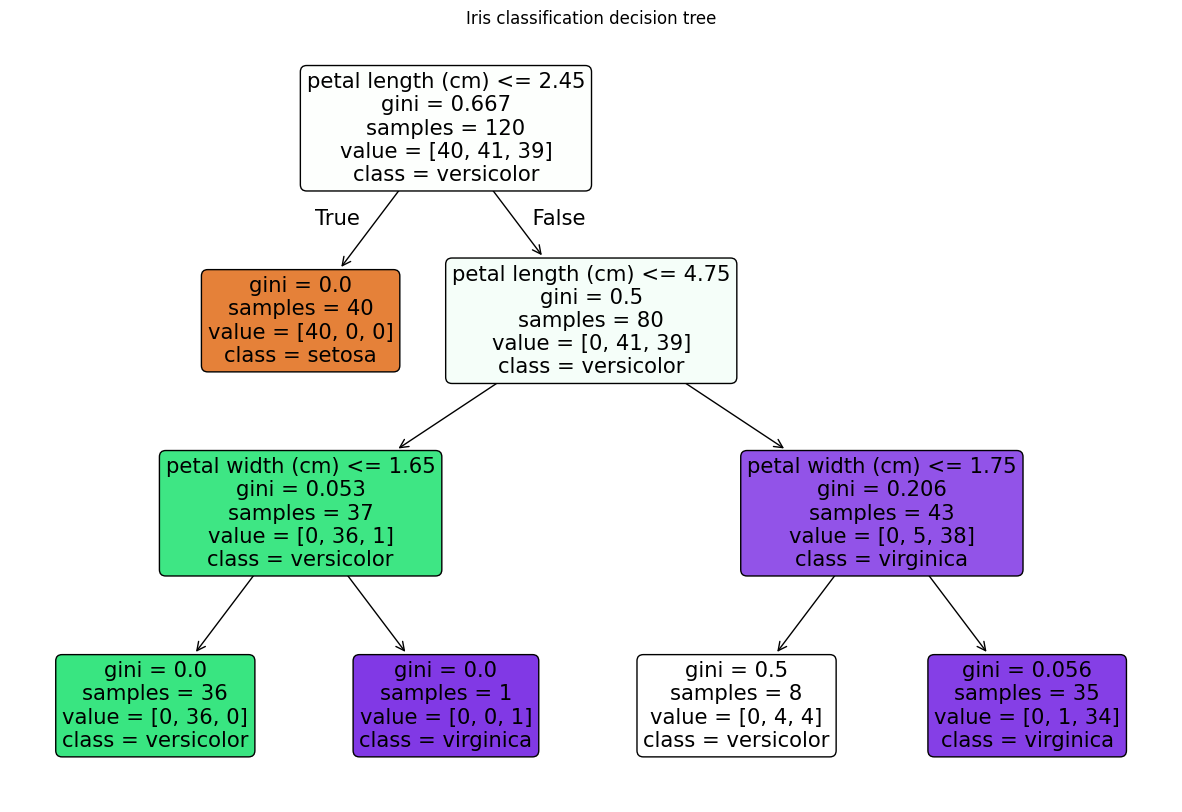

In [11]:
# 可视化决策树
plt.figure(figsize=(15, 10))
plot_tree(clf, 
          filled=True, 
          feature_names=feature_names, 
          class_names=target_names,
          rounded=True)
plt.title("Iris classification decision tree")
plt.show()

# 分析决策树图像
第一行是划分依据


第二行是在不知道任何信息的情况下的基尼指数或者交叉熵的值


第三行是划分前的样本总数


第四行是样本标签有几种类别，每种类别有多少数量